# Lesson 4: Natural Language Processing (NLP)

Welcome to the fourth lesson in our AI course! Now that we understand AI basics, Machine Learning fundamentals, and Deep Learning, let's explore Natural Language Processing - the technology that enables machines to understand and generate human language.


## What is Natural Language Processing (NLP)?

**Natural Language Processing (NLP)** is a field of artificial intelligence that focuses on the interaction between computers and humans using natural language. The ultimate objective of NLP is to enable machines to understand, interpret, and generate human language in a valuable way.

### Key Applications of NLP:

- **Text classification**: Spam detection, sentiment analysis, topic categorization
- **Language translation**: Translating text from one language to another
- **Information extraction**: Pulling structured data from unstructured text
- **Question answering**: Generating responses to natural language questions
- **Text summarization**: Creating concise summaries of longer documents
- **Chatbots & virtual assistants**: Systems that can converse with humans


## Core NLP Tasks

Let's explore some fundamental tasks in NLP:


### 1. Tokenization

**Tokenization** is the process of breaking text into smaller units called tokens, which could be words, characters, or subwords.

#### Why is tokenization important?

- It's the first step in most NLP pipelines
- It converts raw text into a format that can be processed by algorithms
- Different tokenization approaches work better for different languages and tasks

Let's see tokenization in action:


In [2]:
# Basic tokenization examples
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Download required NLTK data
try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")

# Sample text
text = "Natural language processing (NLP) is a field of AI that enables computers to understand human language. It's fascinating!"

# Sentence tokenization
sentences = sent_tokenize(text, language="english")
print("Sentence tokenization:")
for i, sentence in enumerate(sentences):
    print(f"Sentence {i+1}: {sentence}")

# Word tokenization
words = word_tokenize(text)
print("\nWord tokenization:")
print(words)
print(f"Number of tokens: {len(words)}")

# Subword tokenization (used in modern language models)
# Let's simulate this with a simple approach
print("\nSubword tokenization (simplified example):")
word = "preprocessing"
subwords = ["pre", "process", "ing"]
print(f"Word: {word}")
print(f"Subwords: {subwords}")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\super/nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\share\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\lib\\nltk_data'
    - 'C:\\Users\\super\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### 2. Named Entity Recognition (NER)

**Named Entity Recognition (NER)** is the task of identifying and categorizing key information (entities) in text into predefined categories such as person names, organizations, locations, date expressions, monetary values, etc.

#### Applications of NER:

- Information extraction from documents
- Customer service automation
- Content recommendation
- Resume parsing

Let's see NER in action:


In [1]:
# Named Entity Recognition example
import nltk
from nltk import ne_chunk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy
from IPython.display import display, HTML
import pandas as pd

# Download required NLTK data
try:
    nltk.data.find("tokenizers/punkt")
    nltk.data.find("taggers/averaged_perceptron_tagger")
    nltk.data.find("chunkers/maxent_ne_chunker")
    nltk.data.find("corpora/words")
except LookupError:
    nltk.download("punkt")
    nltk.download("averaged_perceptron_tagger")
    nltk.download("maxent_ne_chunker")
    nltk.download("words")

try:
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")
except OSError:
    # If spaCy model is not available, show installation instructions
    print("spaCy model not found. To install, run:")
    print("pip install spacy")
    print("python -m spacy download en_core_web_sm")
    # We'll use NLTK only in this case
    nlp = None

# Sample text with named entities
text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in April 1976 in Cupertino, California. Elon Musk's Tesla is now worth over $500 billion."

# Using NLTK for NER
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
named_entities = ne_chunk(pos_tags)

print("Named Entities detected by NLTK:")
entities = []
for chunk in named_entities:
    if hasattr(chunk, "label"):
        entity_text = " ".join(c[0] for c in chunk)
        entity_type = chunk.label()
        entities.append((entity_text, entity_type))
        print(f"- {entity_text}: {entity_type}")

# Using spaCy for NER (if available)
if nlp is not None:
    print("\nNamed Entities detected by spaCy:")
    doc = nlp(text)
    spacy_entities = []
    for ent in doc.ents:
        spacy_entities.append((ent.text, ent.label_))
        print(f"- {ent.text}: {ent.label_}")

    # Visualize entities with colors
    colors = {
        "ORG": "#7aecec",
        "PERSON": "#aa9cfc",
        "DATE": "#bfe1d9",
        "GPE": "#feca74",
        "MONEY": "#e4e7d2",
    }

    html = "<div style='font-family: Arial; font-size: 16px;'>"
    for token in doc:
        if token.ent_type_:
            bg_color = colors.get(token.ent_type_, "#e4e7d2")
            html += f"<span style='background-color: {bg_color}; padding: 2px; border-radius: 3px; margin: 1px;'>{token.text}</span> "
        else:
            html += token.text + " "
    html += "</div>"

    display(HTML(html))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


spaCy model not found. To install, run:
pip install spacy
python -m spacy download en_core_web_sm


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\super/nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\share\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\lib\\nltk_data'
    - 'C:\\Users\\super\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### 3. Text Summarization

**Text Summarization** is the process of condensing a piece of text to create a shorter version while preserving key information and meaning.

#### Types of summarization:

- **Extractive summarization**: Selects important sentences from the original text
- **Abstractive summarization**: Generates new sentences that capture the essence of the text

Let's implement a basic extractive summarization algorithm:


In [3]:
# Simple extractive text summarization example
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from heapq import nlargest
import numpy as np

# Download required NLTK data
try:
    nltk.data.find("corpora/stopwords")
except LookupError:
    nltk.download("stopwords")


def simple_extractive_summarizer(text, num_sentences=3):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # If there are fewer sentences than requested, return all sentences
    if len(sentences) <= num_sentences:
        return " ".join(sentences)

    # Tokenize words and remove stopwords
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text.lower())
    filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]

    # Calculate word frequencies
    word_freq = FreqDist(filtered_words)

    # Calculate sentence scores based on word frequencies
    sentence_scores = {}
    for i, sentence in enumerate(sentences):
        for word in word_tokenize(sentence.lower()):
            if word in word_freq:
                if i in sentence_scores:
                    sentence_scores[i] += word_freq[word]
                else:
                    sentence_scores[i] = word_freq[word]

    # Get the top N sentences with the highest scores
    top_sentence_indices = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    top_sentence_indices = sorted(top_sentence_indices)

    # Combine the top sentences to form the summary
    summary = [sentences[i] for i in top_sentence_indices]
    return " ".join(summary)


# Sample article text
article = """
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans. 
AI research has been defined as the field of study of intelligent agents, which refers to any system that perceives its environment and takes actions that maximize its chance of achieving its goals.
The term "artificial intelligence" had previously been used to describe machines that mimic and display human cognitive skills that are associated with the human mind, such as learning and problem-solving. 
This definition has since been rejected by major AI researchers who now describe AI in terms of rationality and acting rationally, which does not limit how intelligence can be articulated.
AI applications include advanced web search engines, recommendation systems, understanding human speech, self-driving cars, automated decision-making, and competing at the highest level in strategic game systems.
As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.
The major limitation in defining AI as simply "building machines that are intelligent" is that it doesn't actually explain what artificial intelligence is and what makes a machine intelligent.
Machine learning, a fundamental concept of AI research since the field's inception, is the study of computer algorithms that improve automatically through experience.
Deep learning, a form of machine learning based on artificial neural networks, has driven progress in many AI tasks in recent years.
Natural language processing, the ability of computers to understand human language, is also a crucial part of AI research.
"""

# Generate a summary
summary = simple_extractive_summarizer(article, 3)

print("Original Article:")
print(article)

print("\n" + "-" * 50)
print("Extractive Summary:")
print(summary)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\super/nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\share\\nltk_data'
    - 'c:\\Users\\super\\miniconda3\\envs\\pyt12\\lib\\nltk_data'
    - 'C:\\Users\\super\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


## Word Embeddings: Representing Words as Vectors

One of the key breakthroughs in NLP is the representation of words as dense vectors in a continuous vector space, where semantically similar words are mapped to nearby points.

### Why Word Embeddings?

- Capture semantic relationships between words
- Enable mathematical operations on words (e.g., king - man + woman ≈ queen)
- Provide a dense, low-dimensional representation suitable for neural networks

### Popular Word Embedding Techniques:

- **Word2Vec**: Learns word associations from a large corpus of text
- **GloVe**: Combines global matrix factorization and local context window methods
- **FastText**: Represents words as bags of character n-grams

Let's visualize word embeddings:


In [4]:
# Word Embeddings visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings("ignore")

# Sample sentences for training a small Word2Vec model
sentences = [
    ["king", "queen", "palace", "royal", "crown", "monarch"],
    ["man", "woman", "person", "human", "child", "baby"],
    ["dog", "cat", "pet", "animal", "bird", "fish"],
    ["car", "truck", "vehicle", "drive", "road", "travel"],
    ["computer", "keyboard", "mouse", "screen", "technology", "software"],
    ["king", "man", "queen", "woman", "prince", "princess"],
    ["dog", "puppy", "cat", "kitten", "animal", "pet"],
    ["computer", "technology", "human", "person", "robot", "artificial"],
]

try:
    # Train a Word2Vec model on our tiny dataset
    model = Word2Vec(sentences, vector_size=20, window=3, min_count=1, workers=4, epochs=50)

    # Get vocabulary and vectors
    words = list(model.wv.key_to_index.keys())
    vectors = [model.wv[word] for word in words]

    # Using t-SNE to reduce dimensions for visualization
    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    # Plot the word vectors in 2D space
    plt.figure(figsize=(12, 10))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c="lightblue", edgecolors="blue")

    # Label each point with its word
    for i, (word, (x, y)) in enumerate(zip(words, vectors_2d)):
        plt.annotate(
            word, xy=(x, y), xytext=(5, 2), textcoords="offset points", fontsize=12, alpha=0.8
        )

    plt.title("Word Embeddings Visualization using t-SNE", fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.show()

    # Demonstrate word analogies (king - man + woman = ?)
    try:
        result = model.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
        print(f"king - man + woman = {result[0][0]} (similarity: {result[0][1]:.4f})")
    except KeyError:
        print("Cannot perform analogy with this small model.")

    # Show similar words
    for word in ["king", "computer", "dog"]:
        similar_words = model.wv.most_similar(word, topn=3)
        print(f"\nWords similar to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"- {similar_word}: {similarity:.4f}")

except ImportError:
    print("Gensim not installed. To install, run: pip install gensim")

    # Create some dummy data for visualization
    words = ["king", "queen", "man", "woman", "dog", "cat", "computer", "technology"]
    vectors_2d = np.random.rand(len(words), 2) * 10

    plt.figure(figsize=(12, 10))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c="lightblue", edgecolors="blue")

    for i, (word, (x, y)) in enumerate(zip(words, vectors_2d)):
        plt.annotate(
            word, xy=(x, y), xytext=(5, 2), textcoords="offset points", fontsize=12, alpha=0.8
        )

    plt.title("Word Embeddings Visualization (Simulated)", fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.show()

    print("Note: This is a simulated visualization as Gensim is not installed.")

ModuleNotFoundError: No module named 'gensim'

## Large Language Models (LLMs)

**Large Language Models (LLMs)** are advanced AI models trained on vast amounts of text data that can understand, generate, and manipulate human language in sophisticated ways.

### Key Characteristics of LLMs:

- **Massive scale**: Trained on billions or trillions of parameters
- **Self-supervised learning**: Learn from unlabeled text without human annotations
- **Few-shot learning**: Can perform new tasks with just a few examples
- **Emergent abilities**: Develop capabilities not explicitly designed for

### Popular LLMs:

- **GPT (Generative Pre-trained Transformer)**: OpenAI's series of models
- **Gemini**: Google's multimodal language model
- **Llama**: Meta's open-source LLM
- **BERT**: Google's bidirectional encoder model
- **Claude**: Anthropic's assistant model


### How LLMs Work

LLMs are based on the Transformer architecture, which revolutionized NLP when introduced in 2017. Here's how they work:

1. **Tokenization**: Convert input text into tokens (words or subwords)
2. **Embeddings**: Map tokens to vector representations
3. **Self-attention**: Process tokens in context with each other
4. **Prediction**: Generate probabilities for the next token

LLMs rely on **attention mechanisms** to weigh the importance of different words in a sequence. For example, in the sentence "The animal didn't cross the street because it was too wide," the word "it" refers to "street" not "animal." Attention helps the model make this connection.

Let's visualize the transformer architecture that powers modern LLMs:


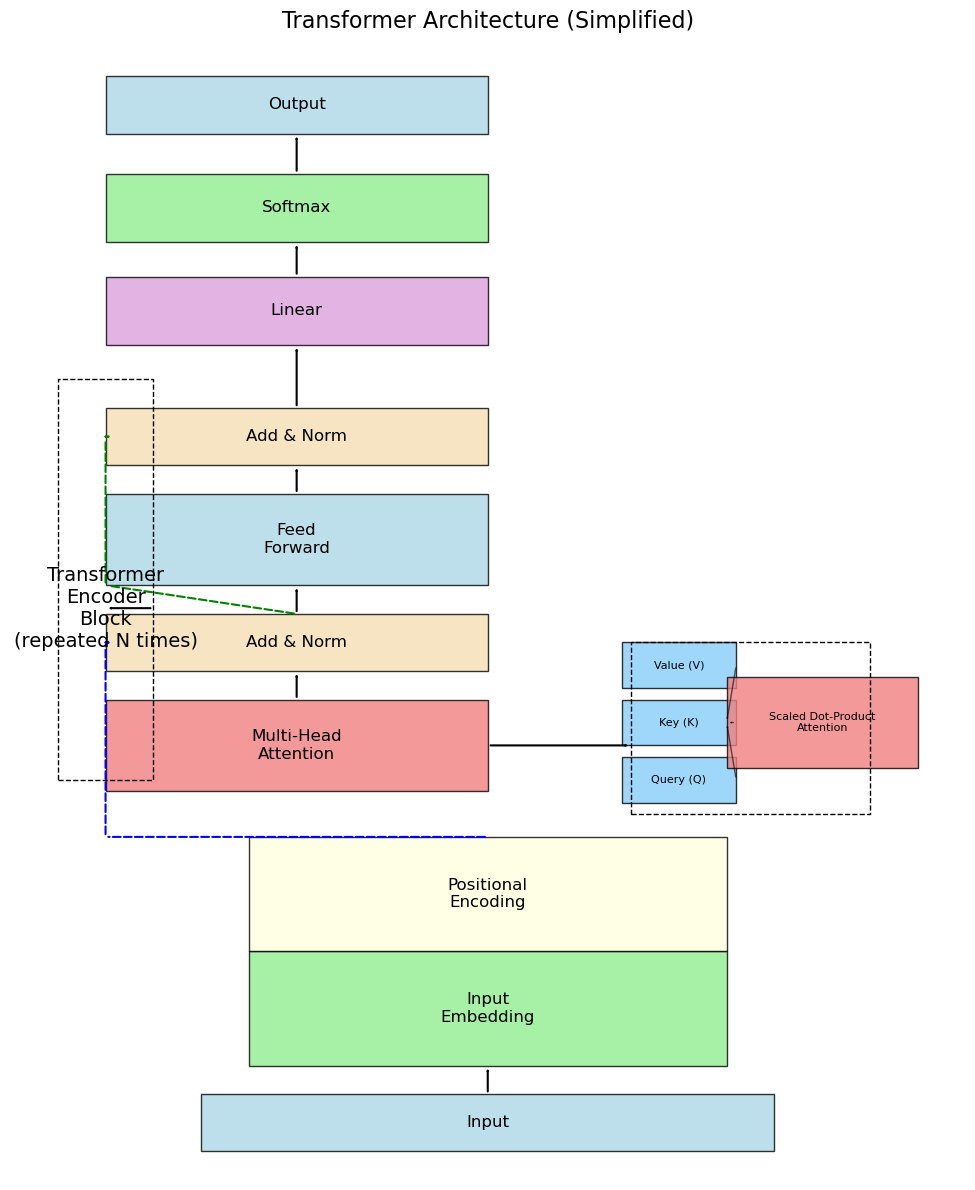

In [5]:
# Transformer architecture visualization
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyArrowPatch

fig, ax = plt.subplots(figsize=(10, 12))

# Define component positions and dimensions
components = [
    {"name": "Input", "width": 0.6, "height": 0.05, "x": 0.5, "y": 0.05, "color": "lightblue"},
    {
        "name": "Input\nEmbedding",
        "width": 0.5,
        "height": 0.1,
        "x": 0.5,
        "y": 0.15,
        "color": "lightgreen",
    },
    {
        "name": "Positional\nEncoding",
        "width": 0.5,
        "height": 0.1,
        "x": 0.5,
        "y": 0.25,
        "color": "lightyellow",
    },
    # Encoder blocks
    {
        "name": "Multi-Head\nAttention",
        "width": 0.4,
        "height": 0.08,
        "x": 0.3,
        "y": 0.38,
        "color": "lightcoral",
    },
    {"name": "Add & Norm", "width": 0.4, "height": 0.05, "x": 0.3, "y": 0.47, "color": "wheat"},
    {
        "name": "Feed\nForward",
        "width": 0.4,
        "height": 0.08,
        "x": 0.3,
        "y": 0.56,
        "color": "lightblue",
    },
    {"name": "Add & Norm", "width": 0.4, "height": 0.05, "x": 0.3, "y": 0.65, "color": "wheat"},
    # Output
    {"name": "Linear", "width": 0.4, "height": 0.06, "x": 0.3, "y": 0.76, "color": "plum"},
    {"name": "Softmax", "width": 0.4, "height": 0.06, "x": 0.3, "y": 0.85, "color": "lightgreen"},
    {"name": "Output", "width": 0.4, "height": 0.05, "x": 0.3, "y": 0.94, "color": "lightblue"},
]

# Draw components
for comp in components:
    rect = Rectangle(
        (comp["x"] - comp["width"] / 2, comp["y"] - comp["height"] / 2),
        comp["width"],
        comp["height"],
        facecolor=comp["color"],
        edgecolor="black",
        alpha=0.8,
    )
    ax.add_patch(rect)
    ax.text(comp["x"], comp["y"], comp["name"], ha="center", va="center", fontsize=12)

# Add label for encoder stack
ax.text(
    0.1,
    0.5,
    "Transformer\nEncoder\nBlock\n(repeated N times)",
    fontsize=14,
    ha="center",
    va="center",
)
rect = Rectangle((0.05, 0.35), 0.1, 0.35, facecolor="none", edgecolor="black", linestyle="--")
ax.add_patch(rect)
arrow = FancyArrowPatch(
    (0.15, 0.5), (0.3 - 0.4 / 2, 0.5), arrowstyle="->", linewidth=1.5, color="black"
)
ax.add_patch(arrow)

# Draw attention mechanism detail
attention_detail = [
    {
        "name": "Query (Q)",
        "width": 0.12,
        "height": 0.04,
        "x": 0.7,
        "y": 0.35,
        "color": "lightskyblue",
    },
    {"name": "Key (K)", "width": 0.12, "height": 0.04, "x": 0.7, "y": 0.4, "color": "lightskyblue"},
    {
        "name": "Value (V)",
        "width": 0.12,
        "height": 0.04,
        "x": 0.7,
        "y": 0.45,
        "color": "lightskyblue",
    },
    {
        "name": "Scaled Dot-Product\nAttention",
        "width": 0.2,
        "height": 0.08,
        "x": 0.85,
        "y": 0.4,
        "color": "lightcoral",
    },
]

# Draw attention components
for comp in attention_detail:
    rect = Rectangle(
        (comp["x"] - comp["width"] / 2, comp["y"] - comp["height"] / 2),
        comp["width"],
        comp["height"],
        facecolor=comp["color"],
        edgecolor="black",
        alpha=0.8,
    )
    ax.add_patch(rect)
    ax.text(comp["x"], comp["y"], comp["name"], ha="center", va="center", fontsize=8)

# Connect attention components
for y_pos in [0.35, 0.4, 0.45]:
    arrow = FancyArrowPatch(
        (0.7 + 0.12 / 2, y_pos),
        (0.85 - 0.2 / 2, 0.4),
        arrowstyle="->",
        linewidth=1,
        color="black",
        alpha=0.6,
    )
    ax.add_patch(arrow)

# Connect attention detail to multi-head attention box
rect = Rectangle((0.65, 0.32), 0.25, 0.15, facecolor="none", edgecolor="black", linestyle="--")
ax.add_patch(rect)
arrow = FancyArrowPatch(
    (0.3 + 0.4 / 2, 0.38), (0.65, 0.38), arrowstyle="->", linewidth=1.5, color="black"
)
ax.add_patch(arrow)

# Add arrows connecting the main components
for i in range(len(components) - 1):
    if i == 2:  # Skip connection after positional encoding (branches to attention)
        continue

    start_y = components[i]["y"] + components[i]["height"] / 2
    end_y = components[i + 1]["y"] - components[i + 1]["height"] / 2

    arrow = FancyArrowPatch(
        (components[i]["x"], start_y),
        (components[i + 1]["x"], end_y),
        arrowstyle="->",
        linewidth=1.5,
        color="black",
    )
    ax.add_patch(arrow)

# Add skip connections
# First skip connection
arrow1 = FancyArrowPatch(
    (0.5, 0.3),  # End of positional encoding
    (0.1, 0.3),  # Left side
    arrowstyle="-",
    linewidth=1.5,
    color="blue",
    linestyle="--",
)
arrow2 = FancyArrowPatch(
    (0.1, 0.3),  # Left side
    (0.1, 0.47),  # Up to first Add & Norm
    arrowstyle="-",
    linewidth=1.5,
    color="blue",
    linestyle="--",
)
arrow3 = FancyArrowPatch(
    (0.1, 0.47),  # Left side at Add & Norm height
    (0.3 - 0.4 / 2, 0.47),  # To Add & Norm
    arrowstyle="->",
    linewidth=1.5,
    color="blue",
    linestyle="--",
)
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.add_patch(arrow3)

# Second skip connection
arrow4 = FancyArrowPatch(
    (0.3, 0.47 + 0.05 / 2),  # End of first Add & Norm
    (0.1, 0.52),  # Left side
    arrowstyle="-",
    linewidth=1.5,
    color="green",
    linestyle="--",
)
arrow5 = FancyArrowPatch(
    (0.1, 0.52),  # Left side
    (0.1, 0.65),  # Up to second Add & Norm
    arrowstyle="-",
    linewidth=1.5,
    color="green",
    linestyle="--",
)
arrow6 = FancyArrowPatch(
    (0.1, 0.65),  # Left side at Add & Norm height
    (0.3 - 0.4 / 2, 0.65),  # To Add & Norm
    arrowstyle="->",
    linewidth=1.5,
    color="green",
    linestyle="--",
)
ax.add_patch(arrow4)
ax.add_patch(arrow5)
ax.add_patch(arrow6)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Transformer Architecture (Simplified)", fontsize=16)
ax.axis("off")

plt.tight_layout()
plt.show()

### Limitations of LLMs

Despite their impressive capabilities, LLMs have important limitations:

1. **Hallucinations**: Generating false or misleading information that sounds plausible
2. **Bias**: Reproducing or amplifying biases present in training data
3. **Computational costs**: Requiring significant resources to train and run
4. **Context window limits**: Having a finite amount of context they can consider at once
5. **Knowledge cutoff**: Being limited to information available at training time


## Retrieval-Augmented Generation (RAG)

**Retrieval-Augmented Generation (RAG)** is an approach that enhances LLMs by connecting them to external knowledge sources, improving their accuracy and reducing hallucinations.

### How RAG Works:

1. **Retrieval**: When a query is received, relevant information is retrieved from external sources
2. **Augmentation**: This information is added to the prompt sent to the LLM
3. **Generation**: The LLM generates a response based on both its internal knowledge and the retrieved information

### Advantages of RAG:

- **Reduced hallucinations**: Grounds the model in factual information
- **Up-to-date knowledge**: Access to information beyond the model's training cutoff
- **Domain-specific expertise**: Can incorporate specialized knowledge bases
- **Transparency**: Sources can be cited

### RAG Architecture:


AttributeError: Rectangle.set() got an unexpected keyword argument 'boxstyle'

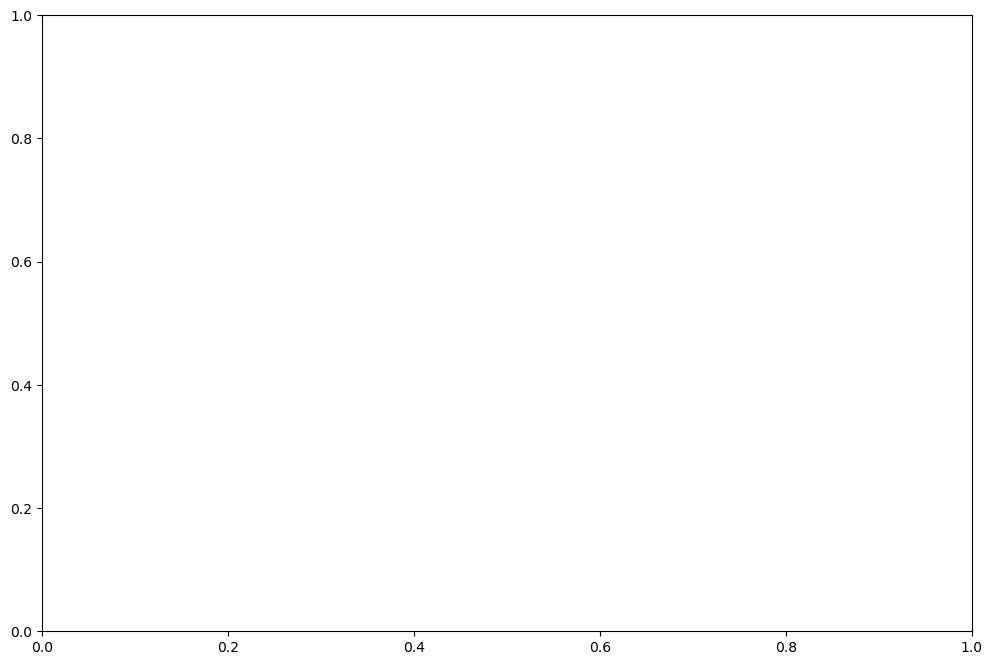

In [6]:
# RAG architecture visualization
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyArrowPatch, Circle

fig, ax = plt.subplots(figsize=(12, 8))

# Define components
components = [
    {
        "name": "User Query",
        "type": "input",
        "x": 0.1,
        "y": 0.5,
        "width": 0.15,
        "height": 0.1,
        "color": "lightblue",
    },
    # Retrieval path
    {
        "name": "Document\nEmbeddings",
        "type": "db",
        "x": 0.35,
        "y": 0.25,
        "width": 0.2,
        "height": 0.2,
        "color": "lightgreen",
    },
    {
        "name": "Knowledge Base",
        "type": "db",
        "x": 0.65,
        "y": 0.25,
        "width": 0.2,
        "height": 0.2,
        "color": "lightyellow",
    },
    # Generation path
    {
        "name": "Combined\nPrompt",
        "type": "process",
        "x": 0.4,
        "y": 0.5,
        "width": 0.15,
        "height": 0.1,
        "color": "lightcoral",
    },
    {
        "name": "Large Language\nModel",
        "type": "model",
        "x": 0.65,
        "y": 0.5,
        "width": 0.2,
        "height": 0.2,
        "color": "plum",
    },
    {
        "name": "Response",
        "type": "output",
        "x": 0.9,
        "y": 0.5,
        "width": 0.15,
        "height": 0.1,
        "color": "lightblue",
    },
]

# Draw components
for comp in components:
    if comp["type"] == "db":
        # Database cylinder
        base = Rectangle(
            (comp["x"] - comp["width"] / 2, comp["y"] - comp["height"] / 2),
            comp["width"],
            comp["height"] * 0.9,
            facecolor=comp["color"],
            edgecolor="black",
        )
        top = plt.matplotlib.patches.Ellipse(
            (comp["x"], comp["y"] + comp["height"] / 2 * 0.9),
            comp["width"],
            comp["height"] * 0.2,
            facecolor=comp["color"],
            edgecolor="black",
        )
        bottom = plt.matplotlib.patches.Ellipse(
            (comp["x"], comp["y"] - comp["height"] / 2),
            comp["width"],
            comp["height"] * 0.2,
            facecolor=comp["color"],
            edgecolor="black",
        )
        ax.add_patch(base)
        ax.add_patch(bottom)
        ax.add_patch(top)
    else:
        # Regular rectangles
        rect = Rectangle(
            (comp["x"] - comp["width"] / 2, comp["y"] - comp["height"] / 2),
            comp["width"],
            comp["height"],
            facecolor=comp["color"],
            edgecolor="black",
            alpha=0.8,
            boxstyle="round,pad=0.3",
        )
        ax.add_patch(rect)

    # Add text
    ax.text(comp["x"], comp["y"], comp["name"], ha="center", va="center", fontsize=12)

# Add arrows
arrows = [
    # User query to embedding db and combined prompt
    {"start": (0.1 + 0.15 / 2, 0.5), "end": (0.35 - 0.2 / 2, 0.25), "color": "blue"},
    {"start": (0.1 + 0.15 / 2, 0.5), "end": (0.4 - 0.15 / 2, 0.5), "color": "blue"},
    # Embedding db to knowledge base
    {"start": (0.35 + 0.2 / 2, 0.25), "end": (0.65 - 0.2 / 2, 0.25), "color": "green"},
    # Knowledge base to combined prompt
    {"start": (0.65, 0.25 + 0.2 / 2), "end": (0.4, 0.5 - 0.1 / 2), "color": "green"},
    # Combined prompt to LLM
    {"start": (0.4 + 0.15 / 2, 0.5), "end": (0.65 - 0.2 / 2, 0.5), "color": "red"},
    # LLM to response
    {"start": (0.65 + 0.2 / 2, 0.5), "end": (0.9 - 0.15 / 2, 0.5), "color": "purple"},
]

for arrow in arrows:
    arr = FancyArrowPatch(
        arrow["start"], arrow["end"], arrowstyle="->", linewidth=1.5, color=arrow["color"]
    )
    ax.add_patch(arr)

# Add process labels
process_labels = [
    {"text": "1. Query embeddings", "pos": (0.2, 0.35), "color": "blue"},
    {"text": "2. Semantic search", "pos": (0.5, 0.15), "color": "green"},
    {"text": "3. Retrieve relevant docs", "pos": (0.55, 0.35), "color": "green"},
    {"text": "4. Augment prompt", "pos": (0.3, 0.4), "color": "red"},
    {"text": "5. Generate response", "pos": (0.8, 0.4), "color": "purple"},
]

for label in process_labels:
    ax.text(
        label["pos"][0],
        label["pos"][1],
        label["text"],
        color=label["color"],
        fontsize=10,
        ha="center",
        fontweight="bold",
    )

# Set plot limits and title
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.8)
ax.set_title("Retrieval-Augmented Generation (RAG) Architecture", fontsize=16)
ax.axis("off")

plt.tight_layout()
plt.show()

## Key Takeaways - NLP Concepts

Here are the key concepts we've covered in this lesson:

| Concept                            | Description                                                                                  |
| ---------------------------------- | -------------------------------------------------------------------------------------------- |
| **Tokenization**                   | The process of breaking text into smaller units (tokens) that can be processed               |
| **Named Entity Recognition**       | Identifying and categorizing key entities in text (people, places, organizations)            |
| **Text Summarization**             | Condensing text to create a shorter version while preserving key information                 |
| **Word Embeddings**                | Dense vector representations of words that capture semantic relationships                    |
| **Large Language Models**          | Advanced AI models trained on vast text data that can understand and generate human language |
| **Transformer Architecture**       | Neural network architecture using self-attention mechanisms that powers modern LLMs          |
| **Retrieval-Augmented Generation** | Enhancing LLMs by connecting them to external knowledge sources                              |


## NLP Quiz - Check Your Understanding

**Q1: What is tokenization in NLP?**  
A: Breaking text into smaller units like words or subwords for processing

**Q2: What is the main advantage of word embeddings over one-hot encoding?**  
A: They capture semantic relationships between words in a dense vector space

**Q3: Which of these is NOT a common task in NLP?**  
A: Image classification (this is computer vision, not NLP)

**Q4: What is the key innovation in the Transformer architecture?**  
A: Self-attention mechanisms that allow the model to weigh the importance of different words

**Q5: What is a common limitation of Large Language Models?**  
A: Hallucinations - generating false information that sounds plausible

**Q6: What is the purpose of Retrieval-Augmented Generation (RAG)?**  
A: To enhance LLMs by connecting them to external knowledge sources

**Q7: Which of these is an example of Named Entity Recognition?**  
A: Identifying "Apple Inc." as an organization in a text

**Q8: What are tokens in the context of LLMs?**  
A: Units of text (words/subwords) processed by the model

**Q9: What is the difference between extractive and abstractive summarization?**  
A: Extractive selects important sentences from original text; abstractive generates new sentences

**Q10: What type of neural network architecture is used in modern LLMs like GPT?**  
A: Transformer architecture


## Further Reading

- [Natural Language Processing with Transformers](https://www.oreilly.com/library/view/natural-language-processing/9781098103231/) by Lewis Tunstall, Leandro von Werra, and Thomas Wolf
- [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/) by Dan Jurafsky and James H. Martin
- [Hugging Face Documentation](https://huggingface.co/docs) - Resources for working with state-of-the-art NLP models
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/) by Jay Alammar - Visual guide to transformers
- [Attention Is All You Need](https://arxiv.org/abs/1706.03762) - Original paper introducing the Transformer architecture
